# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Rio Lintang Cahya
- **Email:** riolintang03@gmail.com / mc007d5y2165@student.devacademy.id
- **ID Dicoding:** MC007D5Y2165

## Menentukan Pertanyaan Bisnis

- Pada musim apa pelanggan banyak menyewa Sepeda ?
- Pukul berapa orang sering dan paling banyak menyewa sepeda ?

## Import Semua Packages/Library yang Digunakan

In [6]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [8]:
# Data penyewaan sepeda yang diaggregasi per jam (total 17.379 jam)
hour_df = pd.read_csv('/content/drive/MyDrive/Coding Camp - DBS Fundation/Belajar Analisis Data dengan Python/Projek Akhir/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Data penyewaan sepeda yang diaggregasi per hari (total 731 hari)
day_df = pd.read_csv('/content/drive/MyDrive/Coding Camp - DBS Fundation/Belajar Analisis Data dengan Python/Projek Akhir/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai hour_df

In [10]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


berdasarkan informasi tersebut, dteday yang merupakan tanggal memiliki tipe data object. maka nanti akan dirubah ke dalam tipe data date

In [12]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Berdasarkan informasi tersebut dataset tidak memiliki missing value

In [13]:
hour_df.duplicated().sum()

0

Berdasarkan informasi tersebut dataset tidak memiliki nilai duplikat

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan informasi tersebut sekilas tidak ada yang mencurigakan.

#### Menilai day_df

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


berdasarkan informasi tersebut, dteday yang merupakan tanggal memiliki tipe data object. maka nanti akan dirubah ke dalam tipe data date

In [17]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Berdasarkan informasi tersebut tidak ada missing value pada dataset

In [18]:
day_df.duplicated().sum()

0

Berdasarkan informasi tersebut tidak ada data duplikat

In [19]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada keanehan dalam tampilan data tersebut

**Insight:**

*hour_df*
- Tipe data kolom 'dteday' yang merupakan tanggal bertipe 'object'
- Tidak ada missing value, duplikasi, dan keanehan pada dataset

*day_df*
- Tipe data kolom 'dteday' yang merupakan tanggal bertipe 'object'
- Tidak ada missing value, duplikasi, dan keanehan pada dataset

### Cleaning Data

In [20]:
# Merubah tipe data 'object' menjadi 'date' pada kolom dday di dataset hour_df dan day_df

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [23]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [24]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- dteday pada dataset day_df sudah bertipe datetime
- dteday pada dataset hour_df sudah bertipe datetime

## Exploratory Data Analysis (EDA)

### Explore tabel hour

In [25]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [26]:
hour_inf = hour_df.groupby(by='hr').agg({
    'cnt': 'mean',
    'casual': 'max',
    'registered': 'max'
})
hour_inf = hour_inf.reset_index()
print(hour_inf)

    hr         cnt  casual  registered
0    0   53.898072      68         234
1    1   33.375691      49         139
2    2   22.869930      44         104
3    3   11.727403      26          61
4    4    6.352941      13          22
5    5   19.889819      16          64
6    6   76.044138      19         203
7    7  212.064649      40         572
8    8  359.011004      69         808
9    9  219.309491     142         399
10  10  173.668501     209         351
11  11  208.143054     268         446
12  12  253.315934     362         526
13  13  253.661180     355         491
14  14  240.949246     361         502
15  15  251.233196     357         456
16  16  311.983562     367         481
17  17  461.452055     347         885
18  18  425.510989     266         886
19  19  311.523352     230         662
20  20  226.030220     237         461
21  21  172.314560     222         362
22  22  131.335165     175         327
23  23   87.831044      71         220


berdasarkan hasil tersebut rata rata penyewaan tertinggi terjadi pada pukul 17 sebanyak 461 penyewa dan tertinggi terjadi pada pukul 18 yaitu 886 penyewa, dan kontribusi terbanyak oleh pelanggan yang sudah ter registrasi

In [27]:
holiday_counts = hour_df.groupby(by='holiday')['cnt'].sum().sort_values(ascending=False).reset_index()
holiday_counts['holiday'] = holiday_counts['holiday'].map({0: 'Tidak Liburan', 1: 'Liburan'})
print(holiday_counts)

         holiday      cnt
0  Tidak Liburan  3214244
1        Liburan    78435


In [28]:
holiday_inf = hour_df.groupby(by='holiday').agg({
    'cnt': ['mean','sum'],
    'casual': 'max',
    'registered': 'max'
})

#Reseti index
holiday_inf = holiday_inf.reset_index()

# Mapping kolom holiday
holiday_inf['holiday'] = holiday_inf['holiday'].map({0: 'Tidak Liburan', 1: 'Liburan'})
print(holiday_inf)

         holiday        cnt          casual registered
                       mean      sum    max        max
0  Tidak Liburan  190.42858  3214244    367        886
1        Liburan  156.87000    78435    272        601


berdasarkan informasi diatas , selama 2 tahun total jumlah penyewa sepeda terjadi pada saat tidak liburan. hal ini menunjukan bahwa penyewaan sepeda kemungkinan banyak digunakan oleh pelanggan untuk kegiatan sehari hari seperti bekerja atau sekolah.

In [29]:
workingday_inf = hour_df.groupby(by='workingday').agg({
    'cnt': ['mean','sum'],
    'casual': 'max',
    'registered': 'max'
})

#Reseti index
workingday_inf = workingday_inf.reset_index()

# Mapping kolom workingday
workingday_inf['workingday'] = workingday_inf['workingday'].map({0: 'Bukan Hari Kerja ', 1: 'Hari Kerja'})
print(workingday_inf)

          workingday         cnt          casual registered
                            mean      sum    max        max
0  Bukan Hari Kerja   181.405332  1000269    367        601
1         Hari Kerja  193.207754  2292410    264        886


berdasarkan informasi diatas , penyewa sepeda paling banyak disewa oleh pelanggan saat kerja. mengikuti informasi sebelumnya dipastikan bahwa banyak penyewa menggunakan saat kerja.

In [30]:
weathershit_inf = hour_df.groupby(by='weathersit').agg({
    'cnt': 'mean',
    'casual': 'max',
    'registered': 'max'
})

#Reset index
weathershit_inf = weathershit_inf.reset_index()

weathershit_inf['weathersit'] = weathershit_inf['weathersit'].map({1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Deras'})
print(weathershit_inf)

     weathersit         cnt  casual  registered
0         Cerah  204.869272     367         886
1       Berawan  175.165493     350         822
2  Hujan Ringan  111.579281     263         791
3   Hujan Deras   74.333333       6         158


### Explore tabel day

In [31]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [32]:
day_df.groupby(by='mnth').agg({
    'cnt': 'mean',
    'casual': 'max',
    'registered': 'max'
})

,cnt,casual,registered
mnth,,,
1,2176.338710,1070,4185
2,2655.298246,1435,4546
3,3692.258065,3155,5893
4,4484.900000,3252,5950
5,5349.774194,3410,6433
6,5772.366667,2963,6456
7,5563.677419,3065,6790
8,5664.419355,2827,6541
9,5766.516667,3160,6946


In [33]:
day_season = day_df.groupby(by=['season','yr']).agg({
    'cnt': 'mean',
    'casual': 'max',
    'registered': 'max'
})
day_season = day_season.reset_index().sort_values(by=['yr','cnt'], ascending=False)
day_season['season'] = day_season['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_season['yr'] = day_season['yr'].map({0: '2011', 1: '2012'})
print(day_season)

   season    yr          cnt  casual  registered
5    Fall  2012  6824.244681    3160        6917
3  Summer  2012  6209.489130    3410        6456
7  Winter  2012  5791.865169    3031        6946
1  Spring  2012  3531.296703    3155        5315
4    Fall  2011  4464.361702    3065        4614
2  Summer  2011  3775.173913    2355        4414
6  Winter  2011  3664.460674    2397        4372
0  Spring  2011  1666.666667    1424        2841


In [34]:
day_weathersit = day_df.groupby(by=['mnth','weathersit']).agg({
    'cnt': 'mean',
    'casual': 'max',
    'registered': 'max'
})
day_weathersit = day_weathersit.reset_index().sort_values(by=['mnth','cnt'], ascending=True)
day_weathersit['weathersit'] = day_weathersit['weathersit'].map({1: 'Cerah', 2: 'Berawan', 3: 'Hujan Ringan', 4: 'Hujan Deras'})
print(day_weathersit)

    mnth    weathersit          cnt  casual  registered
2      1  Hujan Ringan   506.000000      34         472
1      1       Berawan  1959.833333     331        3831
0      1         Cerah  2361.918919    1070        4185
5      2  Hujan Ringan  2169.000000     192        1977
4      2       Berawan  2322.894737     618        3787
3      2         Cerah  2839.135135    1435        4546
8      3  Hujan Ringan  1154.000000     179        1506
7      3       Berawan  3609.291667    3155        5893
6      3         Cerah  3888.583333    1658        5537
11     4  Hujan Ringan   911.000000     121         907
10     4       Berawan  3339.190476    2347        4907
9      4         Cerah  5328.351351    3252        5950
13     5       Berawan  4833.920000    2496        6110
12     5         Cerah  5698.324324    3410        6433
15     6       Berawan  4822.285714    1685        6033
14     6         Cerah  6061.521739    2963        6456
18     7  Hujan Ringan  4459.000000    1264     

In [35]:
cust_counts = day_df.groupby(by='yr').agg({
    'cnt': 'mean',
    'casual': 'sum',
    'registered': 'sum'
})
cust_counts = cust_counts.reset_index()
cust_counts['yr'] = cust_counts['yr'].map({0: '2011', 1: '2012'})
print(cust_counts)

# Menghitung selisih dan persentase peningkatan
selisih_penyewa = cust_counts.loc[cust_counts['yr'] == '2012', 'cnt'].values[0] - cust_counts.loc[cust_counts['yr'] == '2011', 'cnt'].values[0]
persentase_peningkatan = (selisih_penyewa / cust_counts.loc[cust_counts['yr'] == '2011', 'cnt'].values[0]) * 100

# Menampilkan hasil
print(f"Persentase peningkatan penyewa sepeda dari tahun 2011 ke 2012: {persentase_peningkatan:.2f}%")

     yr          cnt  casual  registered
0  2011  3405.761644  247252      995851
1  2012  5599.934426  372765     1676811
Persentase peningkatan penyewa sepeda dari tahun 2011 ke 2012: 64.43%


**Insight:**
- pada tahun 2012 terjadi peningkatan jumlah pesewa sepeda dari 63.43%
- Rata rata tertinggi paling ramai menyewa pada pukul 17:00
- Kontribusi tertinggi diberikan kepada pelanggan yang terdaftar
- Kondisi cuaca merupakan kondisi yang paling tinggi seseorang menyewa sepeda, dan hujan deras menjadi kondisi paling sedikit seseorang menyewa sepeda
- Rata rata tertinggi penyewa pada tahun 2012 musim Fall dan paling rendah pada tahun 2011 musim spring

## Visualization & Explanatory Analysis

### Pertanyaan 1:

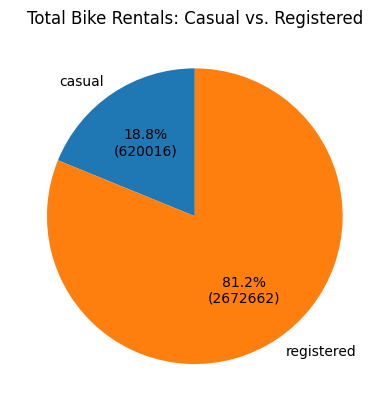

In [36]:
# Calculate the total 'cnt' for 'casual' and 'registered'
casual_cnt = hour_df['casual'].sum()
registered_cnt = hour_df['registered'].sum()


plt.pie(x=[casual_cnt, registered_cnt], labels=['casual', 'registered'], autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*(casual_cnt+registered_cnt))})', startangle=90)
plt.title('Total Bike Rentals: Casual vs. Registered')

plt.show()

Text(0, 0.5, 'Jumlah Penyewaan')

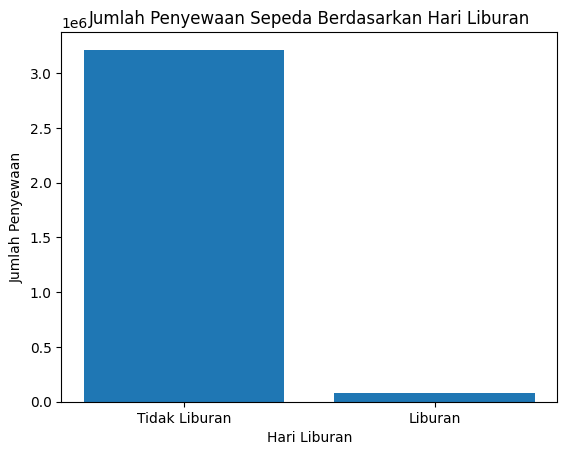

In [37]:
plt.bar(x=holiday_inf['holiday'], height=holiday_inf['cnt']['sum'], label='Total')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Liburan')
plt.xlabel('Hari Liburan')
plt.ylabel('Jumlah Penyewaan')

Text(0, 0.5, 'Jumlah Penyewaan')

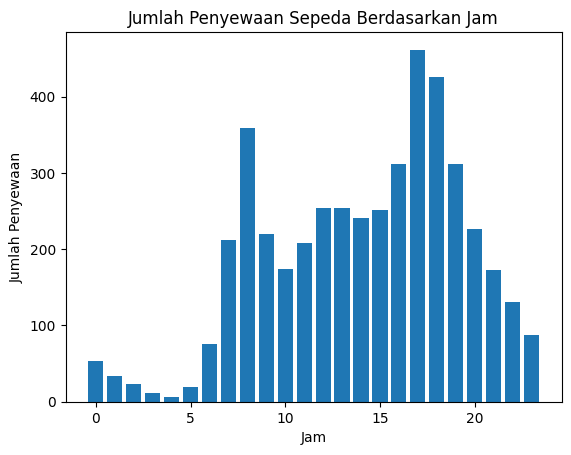

In [38]:
plt.bar(x=hour_inf['hr'], height=hour_inf['cnt'], label='Total')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')

Text(0.5, 0, 'Hari Kerja')

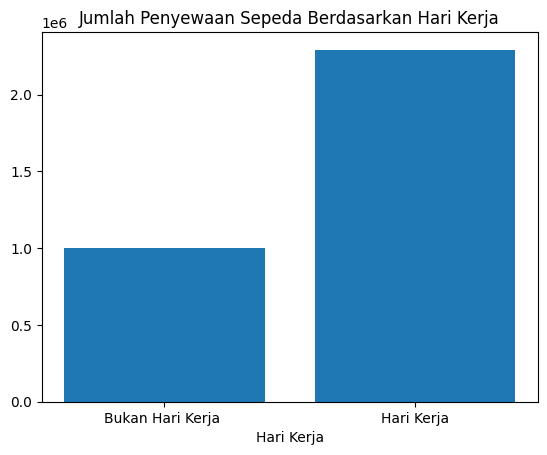

In [39]:
plt.bar(x=workingday_inf['workingday'], height=workingday_inf['cnt']['sum'], label='Total')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')

Text(0.5, 0, 'Kondisi Cuaca')

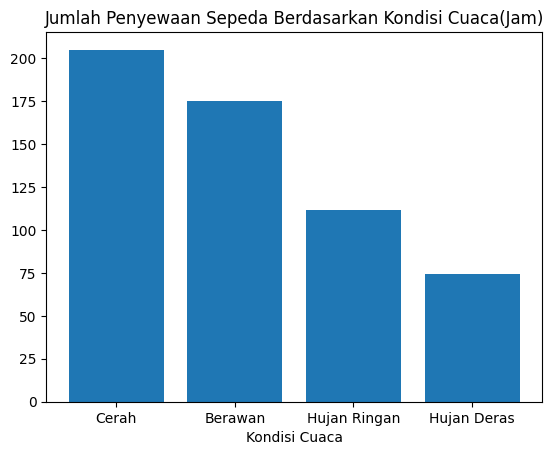

In [40]:
plt.bar(x=weathershit_inf['weathersit'], height=weathershit_inf['cnt'], label='Total')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca(Jam)')
plt.xlabel('Kondisi Cuaca')

### Pertanyaan 2:

Text(0.5, 0, 'Tanggal')

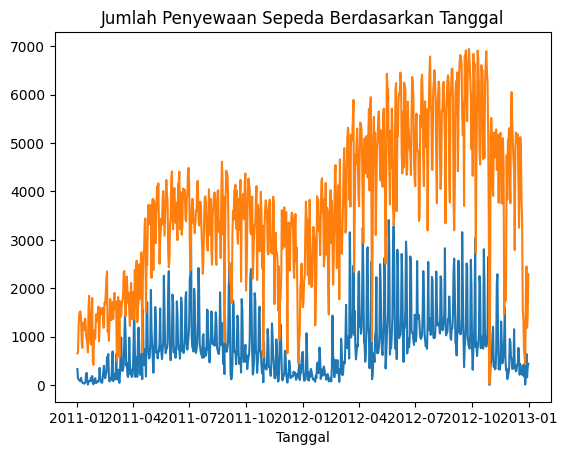

In [69]:
data = day_df.groupby(by='dteday').agg({
    'casual': 'sum',
    'registered': 'sum'
})
data = data.reset_index()

plt.plot(data['dteday'], data['casual'], label='Casual')
plt.plot(data['dteday'], data['registered'], label='Registered')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Tanggal')
plt.xlabel('Tanggal')

Text(0.5, 0, 'Musim')

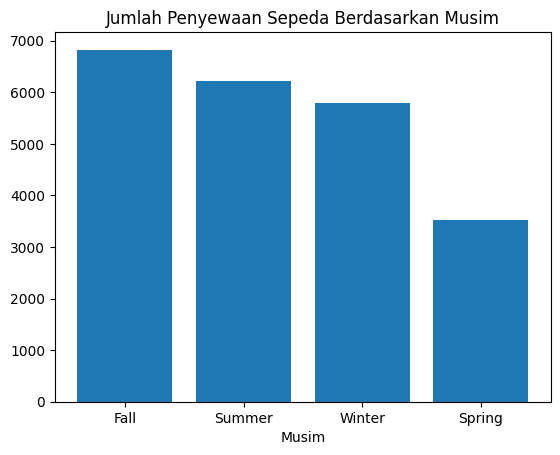

In [41]:
plt.bar(x=day_season['season'], height=day_season['cnt'], label='Total')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')

## Conclusion

- Berdasarkan Informasi Musim yang paling ramai penyewa terjadi pada Musim Fall (Gugur) dan diikuti Musim Summer (Panas). dimana cuaca sangat baik untuk menggunakan transportasi sepeda.
- Jam paling ramai penyewa terjadi pada pukul 17:00 - 18:00 , hal ini bisa jadi jam sibuk orang beraktivitas di Washington D.C

In [44]:
merged_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = 'left',
    left_on = 'dteday',
    right_on = 'dteday'
)

In [51]:
merged_df.to_csv('merged_df.csv', index=False)

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  int64         
 8   workingday_x  17379 non-null  int64         
 9   weathersit_x  17379 non-null  int64         
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

In [53]:
merged_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [55]:
merged_df.groupby(by='dteday').agg({
    'cnt_x': 'sum'
})


,cnt_x
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-27,2114
2012-12-28,3095
2012-12-29,1341
